# **Tugas**

* Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
* Buatlah model CNN untuk klasifikasi dataset MNIST.

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [28]:
# Muat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [29]:
# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Definisikan model CNN dengan batch normalization 
model = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10)
])

In [31]:
# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# Data augmentation
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [33]:
# Latih model dengan data augmentation dan epoch 10
history = model.fit(data_augmentation.flow(train_images, train_labels, batch_size=64),
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 272ms/step - accuracy: 0.4042 - loss: 1.7932 - val_accuracy: 0.5633 - val_loss: 1.2746
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 266ms/step - accuracy: 0.6240 - loss: 1.0647 - val_accuracy: 0.6460 - val_loss: 1.0237
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 264ms/step - accuracy: 0.6836 - loss: 0.8902 - val_accuracy: 0.6481 - val_loss: 1.0315
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 213s 272ms/step - accuracy: 0.7204 - loss: 0.8058 - val_accuracy: 0.7416 - val_loss: 0.7501
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 223ms/step - accuracy: 0.7500 - loss: 0.7177 - val_accuracy: 0.7688 - val_loss: 0.7150
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.7661 - loss: 0.6747 - val_accuracy: 0.7589 - val_loss: 0.7346
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.7852 - loss: 0.6200 - val_accuracy: 0.7954 - val_loss: 0.6086
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.7967 -

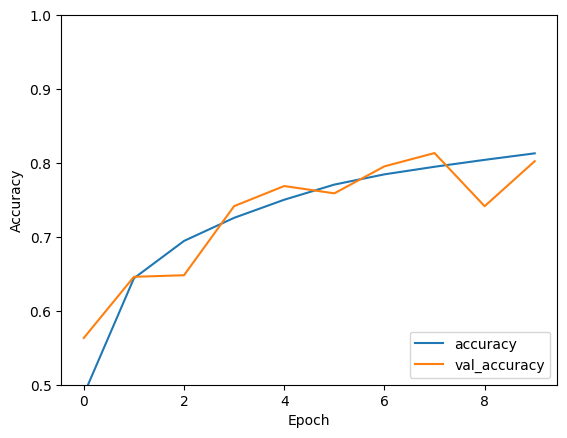

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [37]:
# Evaluasi model
print(test_acc)

0.8023999929428101
